# Gemini API: General Parameters

This notebook covers:

- Temperature
- Max output length
- Token counting


## Setup

Since we've put our gemini API key in Colab Secrets, we can just run the following cells to setup:

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.2/164.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.3/718.3 kB 7.5 MB/s eta 0:00:00


<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Safety.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [2]:
import google.generativeai as genai

In [3]:
from google.colab import userdata
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

## Model Temperature

Steve is indecisive about how to spend his Friday night as a Freshman at Berkeley. He decides to ask Gemini using the 1.5 Flash [variant](https://ai.google.dev/gemini-api/docs/models/gemini):

In [4]:
model_name = 'gemini-1.5-flash'
model = genai.GenerativeModel(model_name)

prompt = "Help me choose a fun way to spend my Friday night as a CS major at Berkeley in a single one-sentence idea"
response = model.generate_content(prompt)
print(response.text)


Grab some friends and head to a late-night hackathon in the basement of Cory Hall for some caffeine-fueled coding fun. 



Steve is very smart and knows that Gemini is non-deterministic; the same prompt can result in different outputs! To demonstrate this, the following code passes the same prompt 5 different times:

In [5]:
outputs = []
prompt = "Help me choose a fun way to spend my Friday night as a CS major at Berkeley in a single one-sentence idea"
for i in range(5):
  response = model.generate_content(prompt)
  outputs.append(response.text)
for index, sentence in enumerate(outputs, start=1):
    print(f"{index}. {sentence}")

1. Join a hackathon at the Sutardja Dai Hall and code all night while fueled by pizza and caffeine. 

2. Grab some fellow CS majors, head to the Soda Hall courtyard for some late-night coding and pizza, fueled by caffeine and the thrill of solving a challenging problem. 

3. Grab some friends, head to the Campanile, and debate the best algorithms for finding the perfect boba tea spot in Berkeley. 

4. Grab some friends, head to the nearby cafe with a killer view, and brainstorm your next hackathon idea over coffee and late-night pizza. 🍕💻 

5. Grab some friends and head to a hackathon at the nearby co-working space for a night of coding, pizza, and friendly competition. 



Gemini returns a different response each time. Hmm. Steve doesn't like the fact that his Friday night might be determined by random chance.

Fortunately, Gemini has a temperature parameter that controls the randomness of the output. Temperature values can range from 0.0 to 2.0. We can check the temperature of our current model as follows:

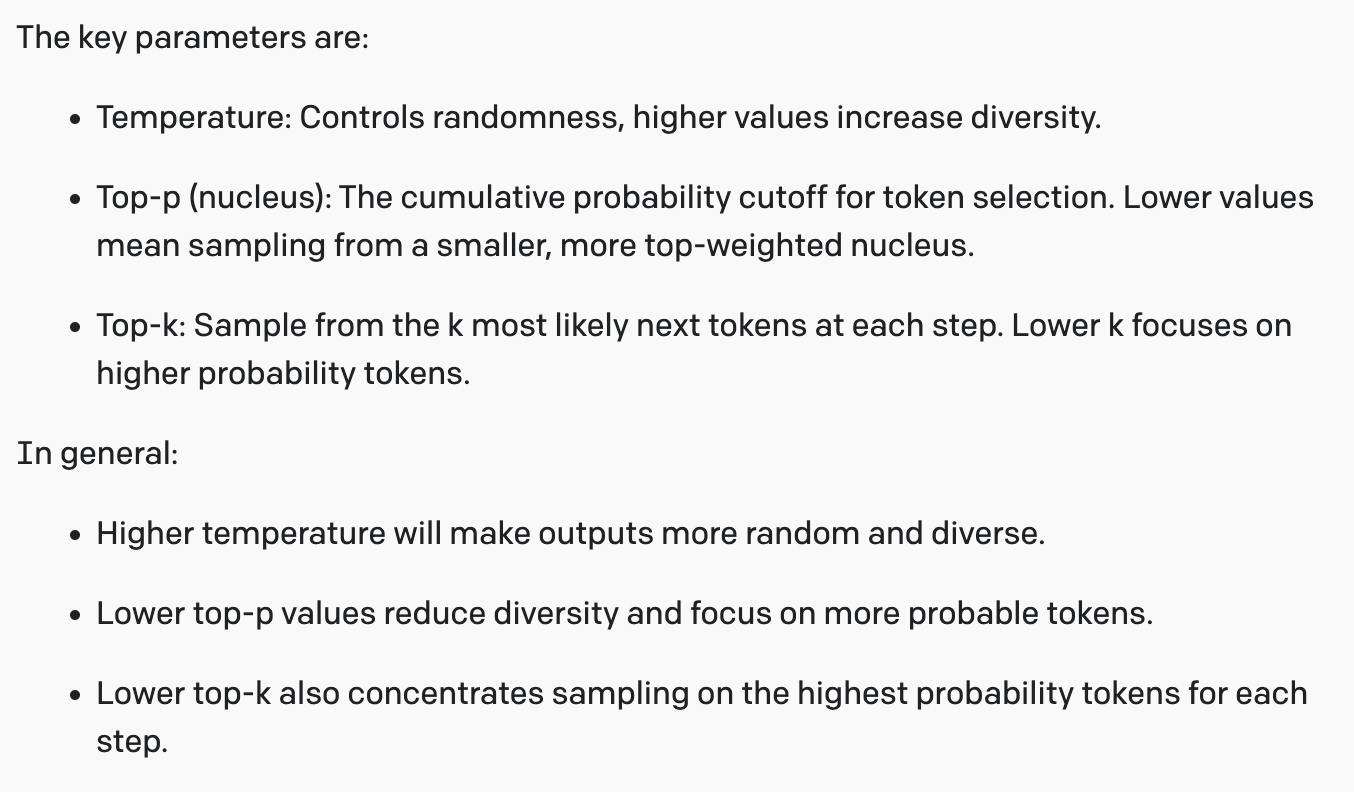

In [6]:
for m in genai.list_models():
    if m.name == 'models/gemini-1.5-flash':
        print(m)

Model(name='models/gemini-1.5-flash',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash',
      description='Fast and versatile multimodal model for scaling across diverse tasks',
      input_token_limit=1048576,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)


Let's initialize a new model with a temperature of 0:

In [7]:
model_name = 'gemini-1.5-flash'
new_outputs = []
low_temp_model = genai.GenerativeModel(model_name, generation_config={"temperature": 0})
for i in range(5):
  response = low_temp_model.generate_content(prompt)
  new_outputs.append(response.text)
for index, sentence in enumerate(new_outputs, start=1):
    print(f"{index}. {sentence}")

1. Grab some friends, head to the Engineering Library for a late-night coding session fueled by pizza and caffeine, and brainstorm solutions to a challenging LeetCode problem. 

2. Grab some friends, head to the Engineering Library for a late-night coding session fueled by pizza and caffeine, and brainstorm solutions to a challenging LeetCode problem. 

3. Grab some friends, head to the Engineering Library for a late-night coding session fueled by pizza and caffeine, and brainstorm solutions to a challenging LeetCode problem. 

4. Grab some friends, head to the Engineering Library for a late-night coding session fueled by pizza and caffeine, and brainstorm solutions to a challenging LeetCode problem. 

5. Grab some friends, head to the Engineering Library for a late-night coding session fueled by pizza and caffeine, and brainstorm solutions to a challenging LeetCode problem. 



All the outputs are the same! Finally Steve can be sure how to spend his night. Conversely, setting temperature to the max value of 2.0 would have the opposite effect, yielding more unpredictable responses.

## Max Output Length

Let's say Steve wants his outputs to be below a certain length. In large language models, text is generated in tokens. For Gemini models, a token is equivalent to about 4 characters. 100 tokens are about 60-80 English words. He can set the `max_output_tokens` variable as follows:

In [8]:
model_name = 'gemini-1.5-flash'
short_response_model = genai.GenerativeModel(model_name, generation_config={"max_output_tokens": 5})
prompt = "Help me choose a fun way to spend my Friday night as a CS major at Berkeley in a single one-sentence idea"
response = short_response_model.generate_content(prompt)
print(response.text)

Grab some friends and head


Notice that this simply halts token generation at a fixed quantity and does not guarantee that the output is complete.

## Token Count

Let's say that Steve is being charged for every token that he inputs to Gemini.

If Steve has billing enabled, the price of a paid request is controlled by the number of input and output tokens, so knowing how to count your tokens is important. As such, Steve might want to know the number of tokens in his prompt (input) before actually putting it into the model.

Let's create a new instance of Gemini 1.5 Flash and set our prompt:

In [9]:
model_name = 'gemini-1.5-flash'
token_n_model = genai.GenerativeModel(model_name, generation_config={"temperature": 0.0})
poem_prompt = "Write me a poem about Berkeley's campus"

In [10]:
response = token_n_model.generate_content(poem_prompt)
response.text

"Where golden hills meet azure sky,\nA campus sprawls, a vibrant sigh.\nBerkeley, a name that echoes bold,\nA tapestry of stories untold.\n\nThe Campanile, a soaring spire,\nA beacon bright, a burning fire.\nIts chimes ring out, a gentle call,\nTo students, scholars, one and all.\n\nThrough Sather Gate, a grand facade,\nA world of knowledge, unafraid.\nFrom Sproul Plaza, a bustling scene,\nOf protests loud, and dreams serene.\n\nThe scent of coffee, books abound,\nIn Doe Library, wisdom profound.\nThe whispering leaves of eucalyptus trees,\nA symphony of nature's breeze.\n\nThe Greek Theatre, a stage of grace,\nWhere laughter rings, and time and space\nAre lost in stories, sung and told,\nOf heroes brave, and dreams of old.\n\nFrom Bancroft Way, a vibrant street,\nTo Strawberry Canyon, a sweet retreat.\nBerkeley's heart, a beating drum,\nA place where minds are free to roam.\n\nSo come, dear traveler, and explore,\nThis campus rich, forevermore.\nFor Berkeley's spirit, strong and true,

Before generating a response, we can check how many tokens are in this prompt using the `.count_tokens` function of the model:

In [11]:
prompt_token_count = token_n_model.count_tokens(poem_prompt)
output_token_count = token_n_model.count_tokens(response.text)
print(f'Tokens in prompt: {prompt_token_count} \n Estimated tokens in output {output_token_count}')

Tokens in prompt: total_tokens: 9
 
 Estimated tokens in output total_tokens: 262

